In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

In [9]:
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0    #Normalization
y_train, y_test = to_categorical(y_train), to_categorical(y_test) # one hot encoding

In [10]:
# Define the neural network architecture
def create_model(hidden_units=None, activation=None): # flatten converts 3D to 1D
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(hidden_units[0], activation=activation), # Hidden Layer 1
        Dense(hidden_units[1], activation=activation), # Hidden Layer 2
        Dense(hidden_units[2], activation=activation), # Hidden Layer 3
        Dense(10, activation='softmax')
    ])
    return model

In [11]:
# Define hyperparameters to test
hidden_units_list = [(256, 128, 64), (256, 128, 64), (1024, 512, 256)]
activation_list = ['relu', 'tanh', 'sigmoid']

In [12]:
results_dict = {}
counter = 1

# Loop through combinations of hidden units and activations
for hidden_units in hidden_units_list:
    for activation in activation_list:

        model = create_model(hidden_units=hidden_units, activation=activation)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

        _, test_acc = model.evaluate(x_test, y_test)

        model_info = { # Create a dictionary for the current iteration
            "Hidden units": hidden_units,
            "Activation": activation,
            "Test accuracy": round(test_acc * 100, 4)
        }

        results_dict[counter] = model_info  # Add the current dictionary to the results dictionary

        counter += 1

Epoch 1/5
782/782 [==============================] - 14s 18ms/step - loss: 1.8682 - accuracy: 0.3215 - val_loss: 1.7013 - val_accuracy: 0.3853
Epoch 2/5
782/782 [==============================] - 15s 19ms/step - loss: 1.6737 - accuracy: 0.3990 - val_loss: 1.6394 - val_accuracy: 0.4087
Epoch 3/5
782/782 [==============================] - 13s 17ms/step - loss: 1.5816 - accuracy: 0.4342 - val_loss: 1.5440 - val_accuracy: 0.4494
Epoch 4/5
782/782 [==============================] - 15s 20ms/step - loss: 1.5280 - accuracy: 0.4531 - val_loss: 1.5303 - val_accuracy: 0.4587
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.5145 - accuracy: 0.4558
Epoch 1/5
782/782 [==============================] - 14s 17ms/step - loss: 2.0032 - accuracy: 0.2597 - val_loss: 1.9229 - val_accuracy: 0.2856
Epoch 2/5
782/782 [==============================] - 14s 18ms/step - loss: 1.8972 - accuracy: 0.3024 - val_loss: 1.8524 - val_accuracy: 0.3237
Epoch 3/5
782/782 [========================

In [13]:
# Print the entire results dictionary
for key, value in results_dict.items():
    print(f"Run {key}:")
    for info_key, info_value in value.items():
        print(f"{info_key}: {info_value}")
    print("- -" * 15)  # Dict prints Separator

print("\n")

# Find the run with the highest test accuracy
max_accuracy_run = max(results_dict, key=lambda k: results_dict[k]["Test accuracy"])
max_accuracy_info = results_dict[max_accuracy_run]

# Print details of the run with the highest test accuracy
print("Run with the highest test accuracy:")
print(f"Run {max_accuracy_run}:")
for info_key, info_value in max_accuracy_info.items():
    print(f"{info_key}: {info_value}")

Run 1:
Hidden units: (512, 256, 128)
Activation: relu
Test accuracy: 45.58
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Run 2:
Hidden units: (512, 256, 128)
Activation: tanh
Test accuracy: 34.52
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Run 3:
Hidden units: (512, 256, 128)
Activation: sigmoid
Test accuracy: 40.86
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Run 4:
Hidden units: (256, 128, 64)
Activation: relu
Test accuracy: 46.7
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Run 5:
Hidden units: (256, 128, 64)
Activation: tanh
Test accuracy: 35.0
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Run 6:
Hidden units: (256, 128, 64)
Activation: sigmoid
Test accuracy: 40.67
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Run 7:
Hidden units: (1024, 512, 256)
Activation: relu
Test accuracy: 44.6
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Run 8:
Hidden units: (1024, 512, 256)
Activation: tanh
Test accuracy: 19.23
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Run 9:
Hidden units: (1024, 51

1/1 [==============================] - 0s 56ms/step


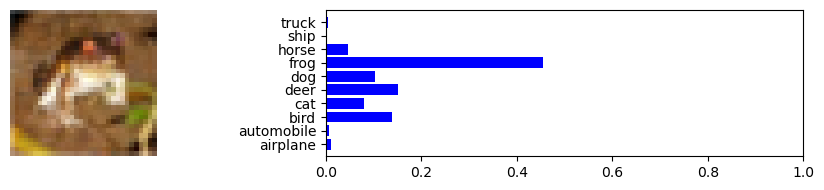

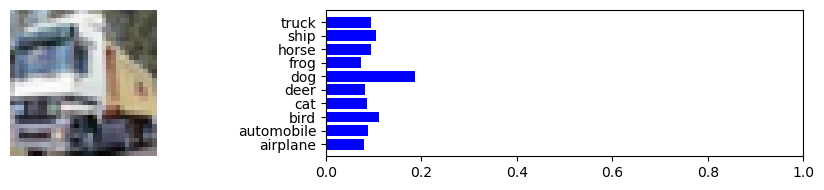

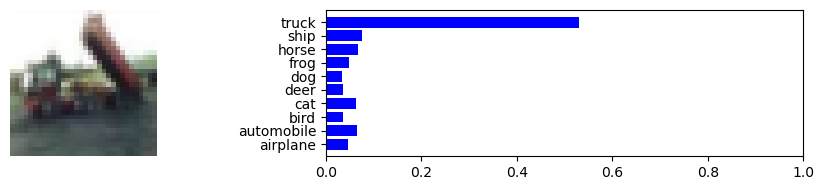

In [14]:
num_images = 3
sample_images = x_train[:num_images]
predictions = model.predict(sample_images)

def plot_probability_meter(predictions, image):
    class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

    fig, axs = plt.subplots(1, 2, figsize=(10, 2))

    # Plot the image
    axs[0].imshow(image)
    axs[0].axis('off')

    # Plot the probability meter
    axs[1].barh(class_labels, predictions[0], color='blue')
    axs[1].set_xlim([0, 1])
    # axs[1].set_xlabel('Probability')

    plt.tight_layout()
    plt.show()

for i in range(num_images):
    plot_probability_meter(predictions[i:i+1], sample_images[i])